# EXPLORATORY DATA ANALYSIS ON PASSENGER DATASET

Age         177
Cabin       687
Embarked      2
dtype: int64


<ipython-input-1-6d558713322e>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = df.groupby("Pclass")["Survived"].mean()
<ipython-input-1-6d558713322e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="coolwarm")


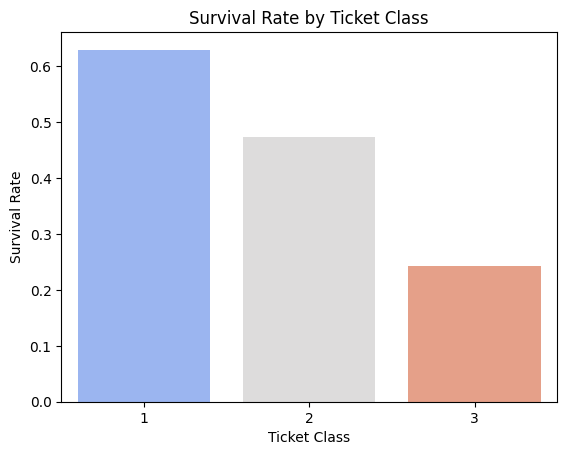

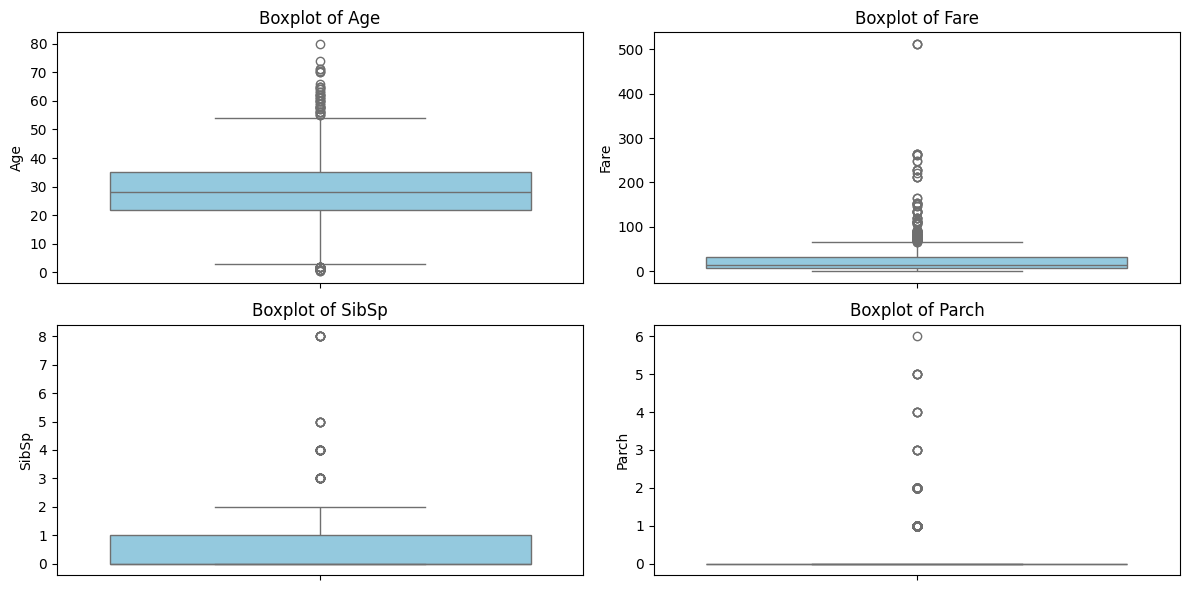

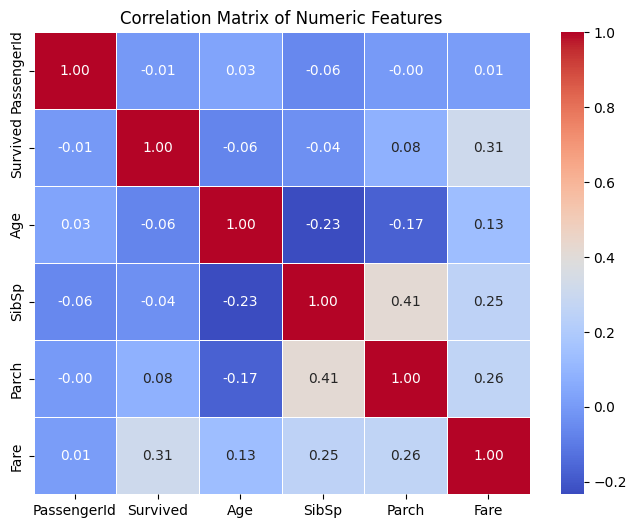

Execution Time on Google Colab: 4.7323 seconds


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
from scipy.stats.mstats import winsorize

# Load Dataset
# link to dataset : https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
file_path = "/content/titanic.csv"
df = pd.read_csv(file_path)

# observing key features
df.describe()

# Observing Null Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values
print(missing_values)

# Performance Measurement Start
start_time = time.time()

# Optimize Data Types
for col in ['Pclass', 'Embarked']:
    df[col] = df[col].astype('category')

# Handling Missing Values Efficiently
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' due to excessive missing values

# Analyzing Survival by Ticket Class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="coolwarm")
plt.xlabel("Ticket Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Ticket Class")
plt.show()

# Identifying Outliers Using Boxplots
numerical_features = ["Age", "Fare", "SibSp", "Parch"]
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

# Outlier Handling: Winsorization for 'Fare'
for k in numerical_features:
  df[k] = winsorize(df[k], limits=[0.05, 0.05])

# Correlation Matrix Visualization
corr_matrix = df.select_dtypes(include = np.number).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Performance Measurement End
execution_time = time.time() - start_time
print(f"Execution Time on Google Colab: {execution_time:.4f} seconds")


# **STEP BY STEP DATA PROCESSING**

 ***LOAD DATASET AND FIND MISSING VALUE***

In [ ]:
df = pd.read_csv(file_path)

# Observing Null Values
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# Load Dataset
# link to dataset : https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
file_path = "/content/titanic.csv"
df = pd.read_csv(file_path)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***SURVIVED VS PCLASS ANALYSIS***

In [ ]:
survival_by_class = df.groupby("Pclass")["Survived"].mean()
survival_by_class


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<ipython-input-22-9da23f26c416>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values,palette="coolwarm")


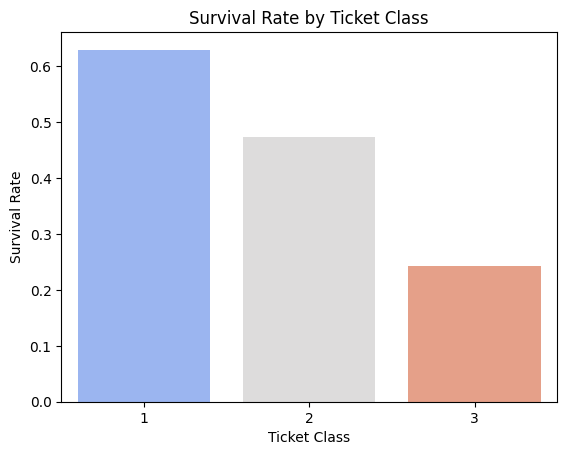

In [ ]:
sns.barplot(x=survival_by_class.index, y=survival_by_class.values,palette="coolwarm")
plt.xlabel("Ticket Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Ticket Class")
plt.show()

## **OUTLIER IDENTIFICATION**

***HISTOGRAM ANALYSIS OF NUMERIC FEATURE***

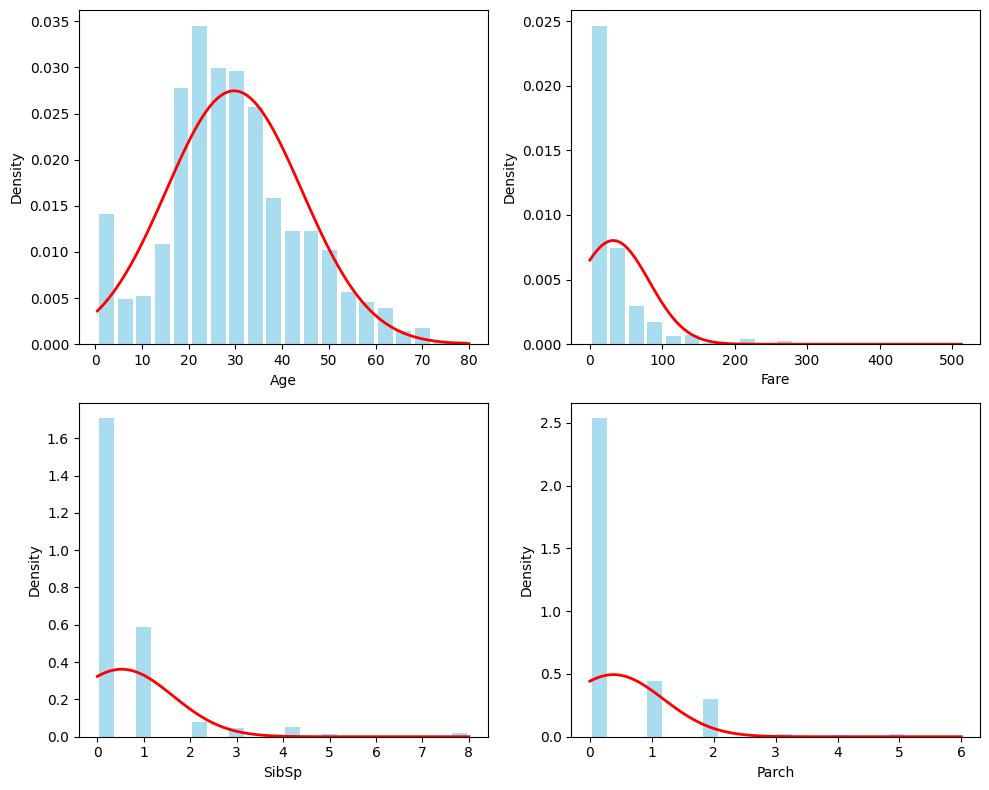

In [ ]:
# outlier analysis
# Define numerical features
numerical_features = ["Age", "Fare", "SibSp", "Parch"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through numerical features and plot each in a different subplot
for idx, k in enumerate(numerical_features):
    i, j = divmod(idx, 2)  # Convert index to 2D position
    # Histogram plot
    axes[i, j].hist(df[k], bins=20, rwidth=0.8, density=True, color='skyblue', alpha=0.7)
    axes[i, j].set_xlabel(k)
    axes[i, j].set_ylabel('Density')
    # Plot bell curve
    rng = np.linspace(df[k].min(), df[k].max(), 100)
    axes[i, j].plot(rng, norm.pdf(rng, df[k].mean(), df[k].std()), color='red', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.show()

***BOXPLOT USING SEABORN***

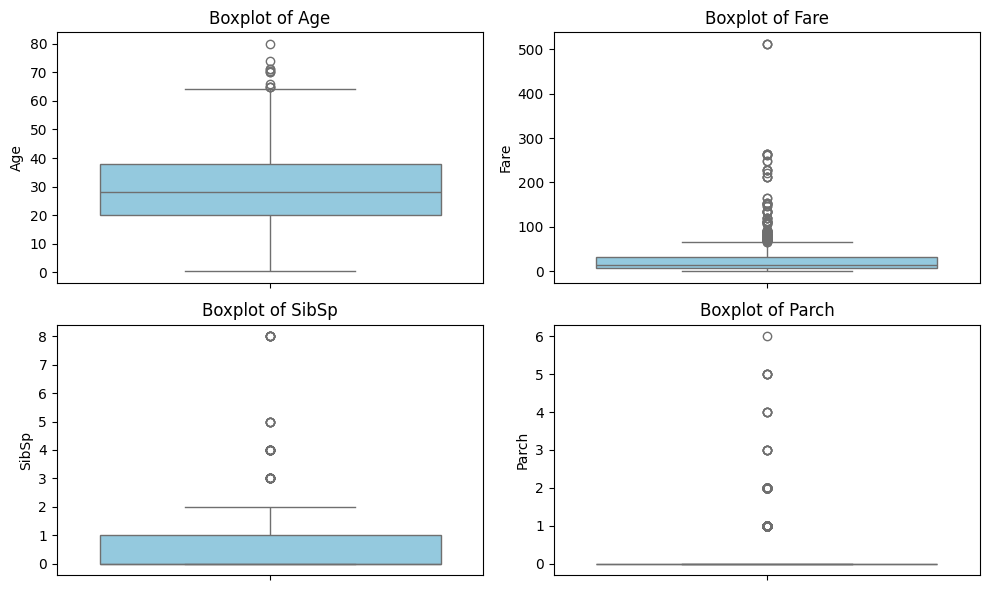

In [ ]:
numerical_features = ["Age", "Fare", "SibSp", "Parch"]
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

## **HANDLING OUTLIERS**

***INCONSISTENCY IN Z-SCORE***

In [ ]:
from scipy.stats import zscore

# Select numerical features for outlier detection
numerical_features = ["Age", "Fare", "SibSp", "Parch"]

# Compute Z-score
z_scores = np.abs(df[numerical_features].apply(zscore))
z_scores

,Age,Fare,SibSp,Parch
0,NaN,0.502445,0.432793,0.473674
1,NaN,0.786845,0.432793,0.473674
2,NaN,0.488854,0.474545,0.473674
3,NaN,0.420730,0.432793,0.473674
4,NaN,0.486337,0.474545,0.473674
...,...,...,...,...
886,NaN,0.386671,0.474545,0.473674
887,NaN,0.044381,0.474545,0.473674
888,NaN,0.176263,0.432793,2.008933
889,NaN,0.044381,0.474545,0.473674


***WINSORIZATION***

In [ ]:
for k in numerical_features:
  df[k] = winsorize(df[k], limits=[0.05, 0.05])

***BOXPLOT AFTER USING WINSORIZATION***

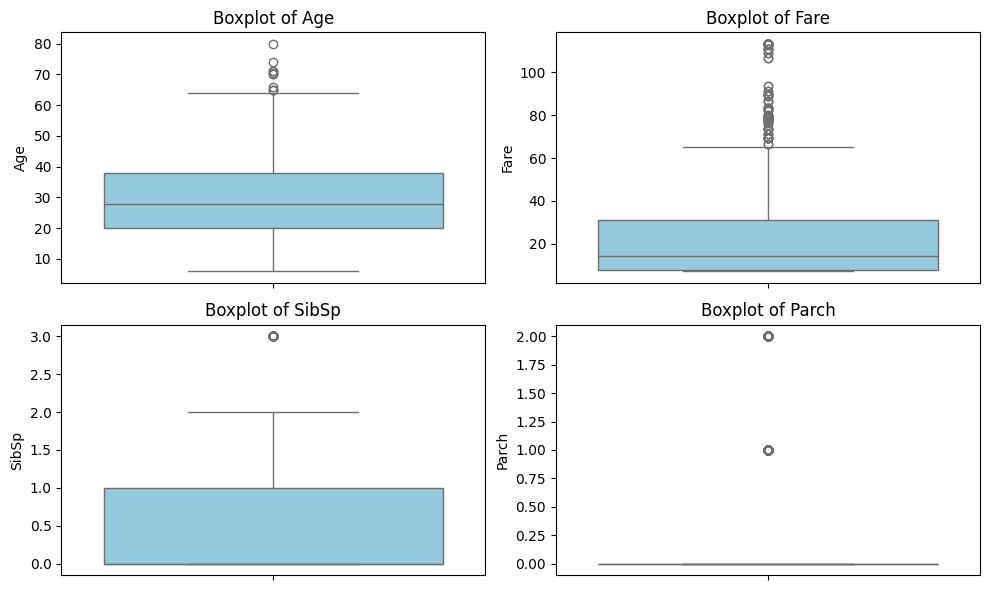

In [ ]:
numerical_features = ["Age", "Fare", "SibSp", "Parch"]
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()